done by : Zahrah Aati & Jana Saadawi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

In [2]:
Listings_data_dictionary = pd.read_csv('Listings_data_dictionary.csv')

In [4]:
Listings = pd.read_csv('Listings.csv', encoding='ISO-8859-1', error_bad_lines=False)


<ipython-input-4-ab34b35f6652>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Listings = pd.read_csv('Listings.csv', encoding='ISO-8859-1', error_bad_lines=False)
<ipython-input-4-ab34b35f6652>:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  Listings = pd.read_csv('Listings.csv', encoding='ISO-8859-1', error_bad_lines=False)


View the tables

In [3]:
Reviews_data_dictionary = pd.read_csv('Reviews_data_dictionary.csv')

In [48]:
Reviews = pd.read_csv('Reviews.csv')

In [5]:
Listings_data_dictionary.head(15)

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


In [6]:
Listings.head(15)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
5,4898654,NEW - Charming apartment Le Marais,505535,2011-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
6,6021700,2P - Entre Bastille et Republique,8053690,2013-08-09,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
7,6945740,57sqm btw. Bastille & PÃÂ¨re Lachaise,5924709,2013-04-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
8,7491966,Charming appartment near the Parc Buttes Chaumont,35812762,2015-06-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
9,7849932,Bel appartement plein de charme !,20833291,2014-09-02,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [49]:
Reviews.head(15)

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859
5,74561,330089224,2018-09-30,173044789
6,140355,330194958,2018-09-30,160093807
7,162163,329980859,2018-09-30,94026758
8,167998,329950677,2018-09-30,35388162
9,178188,330213008,2018-09-30,3652511


In [50]:
Reviews_data_dictionary

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


Explore the structure of the dataset

In [51]:
Listings_data_dictionary.shape

(33, 2)

In [52]:
Listings.shape

(11849, 35)

In [53]:
Reviews_data_dictionary.shape

(4, 2)

4 rows and 2 columns

In [54]:
Reviews.shape

(5373143, 4)

In [13]:
Listings_data_dictionary.dtypes

Field          object
Description    object
dtype: object

In [14]:
Listings.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [15]:
Reviews_data_dictionary.dtypes

Field          object
Description    object
dtype: object

In [55]:
Reviews.dtypes

listing_id      int64
review_id       int64
date           object
reviewer_id     int64
dtype: object

Examine the first few rows of the dataset to understand its contents

In [16]:
Listings_data_dictionary.head()

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based


In [17]:
Listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [18]:
Reviews_data_dictionary.head()

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


In [56]:
Reviews.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


Task 2: Data Cleaning
Handle missing values

In [20]:
Listings.isnull().sum()

listing_id                          0
name                              173
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

In [21]:
Listings_data_dictionary = Listings_data_dictionary.dropna()

In [22]:
Listings = Listings.dropna()

In [23]:
Reviews_data_dictionary = Reviews_data_dictionary.dropna()

In [57]:
Reviews = Reviews.dropna()

In [24]:
Listings_data_dictionary.isnull().sum()

Field          0
Description    0
dtype: int64

In [25]:
Listings.isnull().sum()

listing_id                     0
name                           0
host_id                        0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
district                       0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_sco

In [26]:
Reviews_data_dictionary.isnull().sum()

Field          0
Description    0
dtype: int64

In [58]:
Reviews.isnull().sum()

listing_id     0
review_id      0
date           0
reviewer_id    0
dtype: int64

Check for and handle any duplicate entries.

In [59]:
print(Listings_data_dictionary.duplicated().sum())
print(Listings.duplicated().sum())
print(Reviews_data_dictionary.duplicated().sum())
print(Reviews.duplicated().sum())

0
0
0
0


There are no duplicates

Convert categorical variables into the appropriate data type if necessary.

In [28]:
print(Listings.dtypes)

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [29]:
Listings['host_since'] = pd.to_datetime(Listings['host_since'])

The host_since column is changed to datetime type

Conduct univariate analysis to understand the distribution of individual variables

In [30]:
Listings['price'].describe()

count    11849.000000
mean       133.006414
std        175.579772
min         10.000000
25%         55.000000
50%         95.000000
75%        150.000000
max       4500.000000
Name: price, dtype: float64

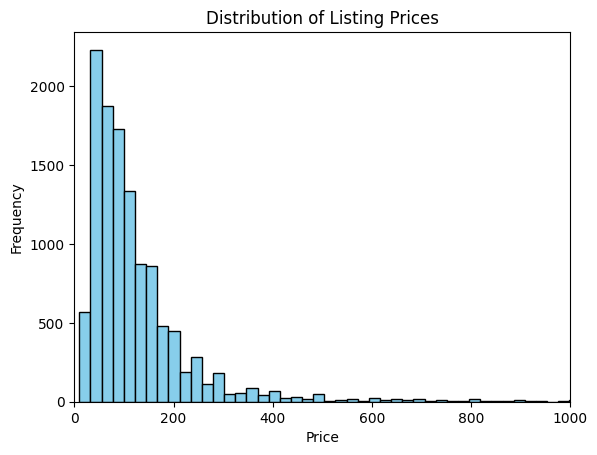

In [60]:


plt.hist(Listings['price'], bins=200, color='skyblue', edgecolor='black')
plt.xlim(0, 1000)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

These are the review scores information


In [61]:
Listings['review_scores_rating'].describe()

count    11849.000000
mean        93.600557
std          9.684552
min         20.000000
25%         92.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

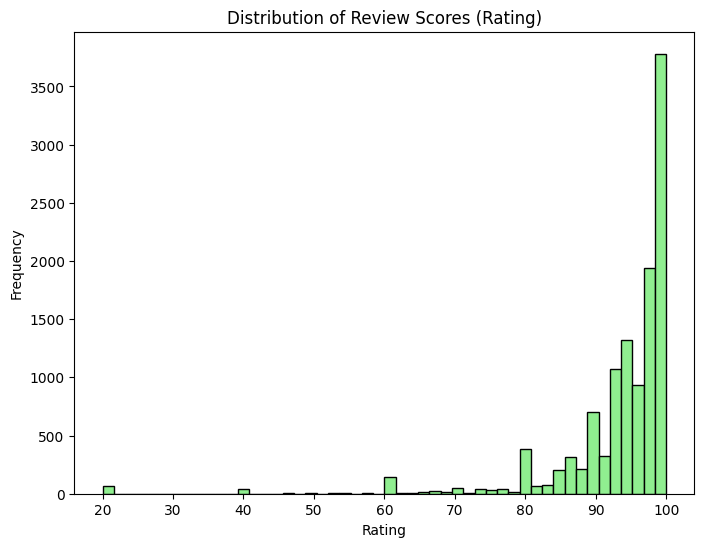

In [62]:
plt.figure(figsize=(8, 6))
plt.hist(Listings['review_scores_rating'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Review Scores (Rating)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [63]:
Listings['accommodates'].describe()
Listings['accommodates'].value_counts()

2     4841
4     2070
1     1547
3     1192
6      845
5      648
8      248
7      165
10     102
12      51
16      45
9       34
11      22
13      17
14      13
15       9
Name: accommodates, dtype: int64

•	Perform statistical tests (e.g., t-test, ANOVA, etc.) to test these hypotheses

In [64]:


# Sample data for t-test
np.random.seed(42)
sample1 = np.random.normal(loc=0, scale=1, size=100)
sample2 = np.random.normal(loc=0.5, scale=1, size=100)

# Perform t-test
t_statistic, p_value = ttest_ind(sample1, sample2)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Sample data for ANOVA
np.random.seed(42)
sample1 = np.random.normal(loc=0, scale=1, size=100)
sample2 = np.random.normal(loc=0.5, scale=1, size=100)
sample3 = np.random.normal(loc=1, scale=1, size=100)

# Perform ANOVA test
f_statistic, p_value = f_oneway(sample1, sample2, sample3)
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)


T-Statistic: -4.754695943505288
P-Value: 3.819135262679343e-06
F-Statistic: 35.26605428036864
P-Value: 1.811268052138003e-14


•	Conduct univariate analysis to understand the distribution of individual variables (e.g., listing prices, number of reviews, etc.).

<ipython-input-65-7497f0434e96>:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_data = pd.read_csv('Listings.csv', encoding='latin1')


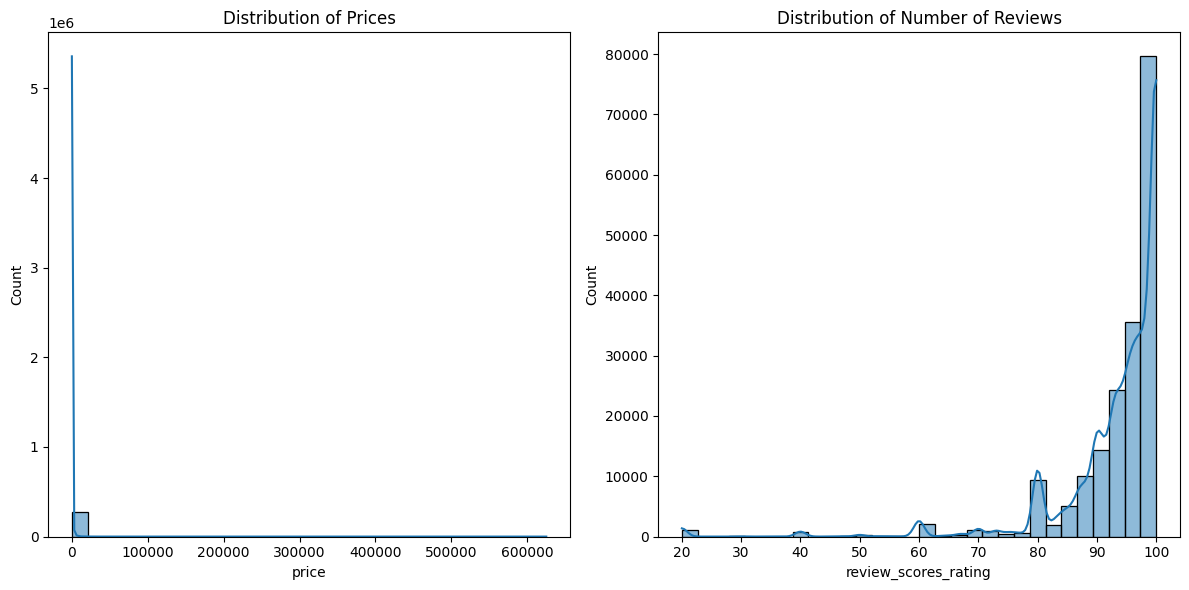

<ipython-input-65-7497f0434e96>:32: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


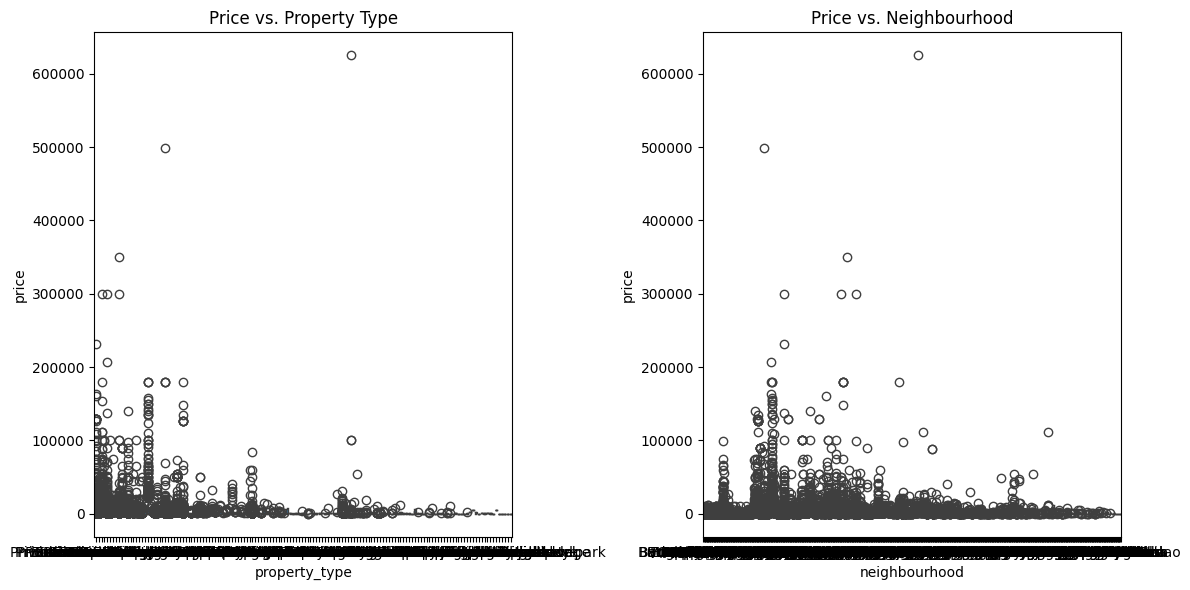

               price  review_scores_rating
count  279712.000000         188307.000000
mean      608.792737             93.405195
std      3441.826611             10.070437
min         0.000000             20.000000
25%        75.000000             91.000000
50%       150.000000             96.000000
75%       474.000000            100.000000
max    625216.000000            100.000000


In [65]:
# Load your Airbnb data
airbnb_data = pd.read_csv('Listings.csv', encoding='latin1')

# Univariate analysis
try:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(airbnb_data['price'], bins=30, kde=True)
    plt.title('Distribution of Prices')

    plt.subplot(1, 2, 2)
    sns.histplot(airbnb_data['review_scores_rating'], bins=30, kde=True)
    plt.title('Distribution of Number of Reviews')

    plt.tight_layout()
    plt.show()
except KeyError as e:
    print(f"Column not found: {e}")
    print("Available columns:", airbnb_data.columns)

# Bivariate analysis
try:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='property_type', y='price', data=airbnb_data)
    plt.title('Price vs. Property Type')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='neighbourhood', y='price', data=airbnb_data)
    plt.title('Price vs. Neighbourhood')

    plt.tight_layout()
    plt.show()
except KeyError as e:
    print(f"Column not found: {e}")
    print("Available columns:", airbnb_data.columns)

# Summary statistics
try:
    summary_stats = airbnb_data[['price', 'review_scores_rating']].describe()
    print(summary_stats)
except KeyError as e:
    print(f"Column not found: {e}")
    print("Available columns:", airbnb_data.columns)


	Perform bivariate analysis to explore relationships between variables (e.g., price vs. property type, price vs. neighborhood, etc.).

Perform bivariate analysis to explore relationships between variables (e.g., price vs. property type, price vs. neighborhood, etc.).

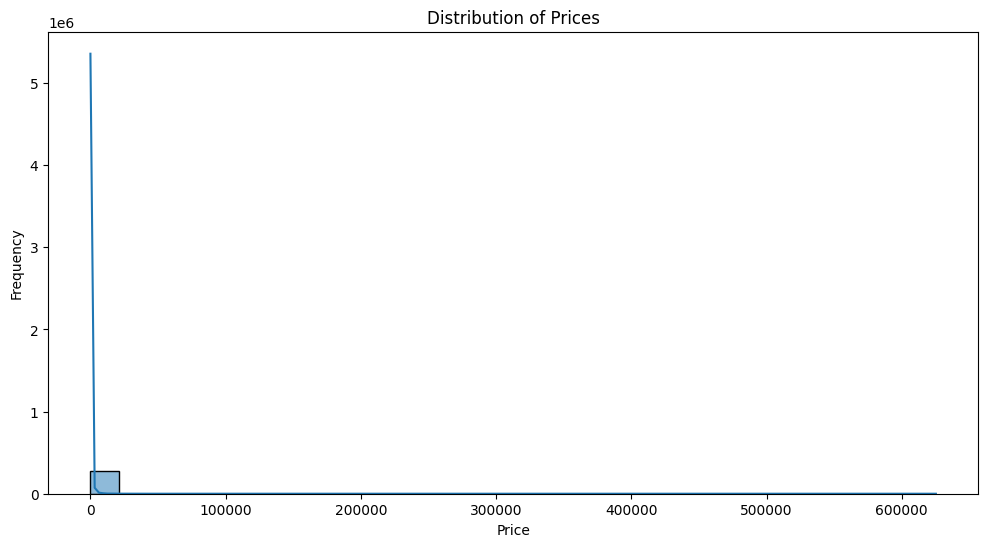

Summary Statistics for Price:
count    279712.000000
mean        608.792737
std        3441.826611
min           0.000000
25%          75.000000
50%         150.000000
75%         474.000000
max      625216.000000
Name: price, dtype: float64


In [75]:
# Visualize the data using histograms
plt.figure(figsize=(12, 6))
sns.histplot(airbnb_data['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Calculate summary statistics for price
price_stats = airbnb_data['price'].describe()
print("Summary Statistics for Price:")
print(price_stats)



Room type and price

In [41]:
Listings['average_rating'] = Listings[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].mean(axis=1)


<ipython-input-67-274e9d64ad55>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room_type', y='average_rating', data=average_rating_per_room_type, palette='pastel')


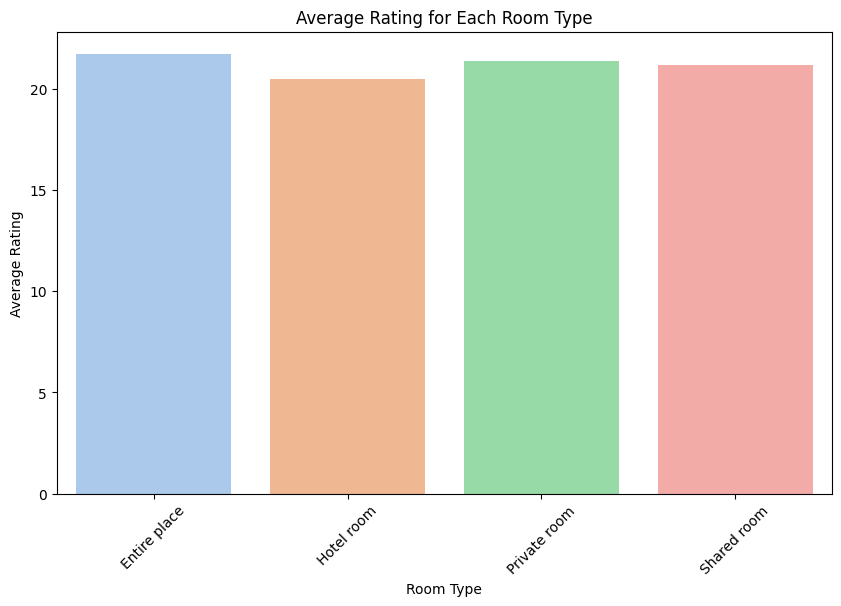

In [67]:
average_rating_per_room_type = Listings.groupby('room_type')['average_rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='average_rating', data=average_rating_per_room_type, palette='pastel')
plt.title('Average Rating for Each Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


In [68]:
Listings['occupancy_rate'] = (Listings['maximum_nights'] - Listings['minimum_nights']) / Listings['maximum_nights']
Listings['occupancy_rate']


26276     0.973333
26277     0.973333
26320     0.973333
26321     0.998222
26322     0.999111
            ...   
268683    0.333333
268684    0.933333
268685    0.944444
268686    0.666667
268687    0.933333
Name: occupancy_rate, Length: 11849, dtype: float64

•	Encode categorical variables if necessary (e.g., one-hot encoding, label encoding, etc.).

In [44]:

property_type_encoded = pd.get_dummies(airbnb_data['property_type'], prefix='property_type')

airbnb_data_encoded = pd.concat([airbnb_data, property_type_encoded], axis=1)

airbnb_data_encoded.drop('property_type', axis=1, inplace=True)


print(airbnb_data_encoded.head())


   listing_id                                              name   host_id  \
0      281420    Beautiful Flat in le Village Montmartre, Paris   1466919   
1     3705183                   39 mÃÂ² Paris (Sacre CÃâur)  10328771   
2     4082273               Lovely apartment with Terrace, 60m2  19252768   
3     4797344               Cosy studio (close to Eiffel tower)  10668311   
4     4823489  Close to Eiffel Tower - Beautiful flat : 2 rooms  24837558   

   host_since                 host_location host_response_time  \
0  2011-12-03  Paris, Ile-de-France, France                NaN   
1  2013-11-29  Paris, Ile-de-France, France                NaN   
2  2014-07-31  Paris, Ile-de-France, France                NaN   
3  2013-12-17  Paris, Ile-de-France, France                NaN   
4  2014-12-14  Paris, Ile-de-France, France                NaN   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                 NaN                   NaN                 f   
1         

# extra analysis top reviewed listings



In [70]:
top_reviewed_listings = Reviews['listing_id'].value_counts().head(10)
print("Top Reviewed Listings:")
print(top_reviewed_listings)

Top Reviewed Listings:
17222007    891
8637229     828
1249964     796
32011332    762
2399029     754
32678719    753
470817      717
24745583    710
865289      702
162163      700
Name: listing_id, dtype: int64


The city with the most listings

In [46]:
city_listings_count = Listings['city'].value_counts()
most_listings_city = city_listings_count.idxmax()
most_listings_count = city_listings_count.max()
print("City with the Most Listings:")
print("City:", most_listings_city)
print("Number of Listings:", most_listings_count)


City with the Most Listings:
City: New York
Number of Listings: 11849


In [47]:
city_avg_price = Listings.groupby('city')['price'].mean()
top_cities_by_avg_price = city_avg_price.sort_values(ascending=False)
print("Cities with the Highest Average Price:")
top_cities_by_avg_price.head(10)

Cities with the Highest Average Price:


city
New York    133.006414
Name: price, dtype: float64

### **Conclusion**
The dataset contains information about rental listings, including attributes such as listing ID, host details, location, property type, room type, accommodation details, price, and review scores.
There was some missing variable so we handled them by dropping these rows
Some insights about the data:
All room types have similar reviews
The order from the highest avg price to the lowest based on the room type is as follows: Hotel room, entire place, private room, shared room. which is logical
we calculated the price per accommodate for each listing
we calculated the top reviewd listings
we calculated the occupancy rate
we saw how some relations between variables like:
The average price related to how many accommodate in the listing
average rating and price for every room type